In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
print(df.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [4]:
print(df.columns)

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')


In [5]:
market_price_dict = {
    'Arecanut': 250000,        
    'Arhar/Tur': 6200,
    'Castor seed': 5300,      
    'Coconut ': 11000,         
    'Cotton(lint)': 52000,    
}

In [6]:
cost_cultivation_dict = {
    'Arecanut': 244365,         
    'Arhar/Tur': 71370,
    'Castor seed': 40000,
    'Coconut ': 155836,
    'Cotton(lint)': 82200,
}

In [7]:
df['Market_Price'] = df['Crop'].map(market_price_dict)
df['Cost_of_Cultivation'] = df['Crop'].map(cost_cultivation_dict)

In [8]:
df['Revenue'] = df['Yield'] * df['Market_Price']

In [9]:
df['Profit'] = df['Revenue'] - df['Cost_of_Cultivation']

In [10]:
df['ROI'] = (df['Profit'] / df['Cost_of_Cultivation']) * 100

In [11]:
print(df[['Crop', 'Yield', 'Market_Price', 'Revenue', 'Cost_of_Cultivation', 'Profit', 'ROI']].head(10))

           Crop        Yield  Market_Price       Revenue  Cost_of_Cultivation  \
0      Arecanut     0.796087      250000.0  1.990217e+05             244365.0   
1     Arhar/Tur     0.710435        6200.0  4.404696e+03              71370.0   
2   Castor seed     0.238333        5300.0  1.263167e+03              40000.0   
3      Coconut   5238.051739       11000.0  5.761857e+07             155836.0   
4  Cotton(lint)     0.420909       52000.0  2.188727e+04              82200.0   
5  Dry chillies     0.643636           NaN           NaN                  NaN   
6          Gram     0.465455           NaN           NaN                  NaN   
7          Jute     9.919565           NaN           NaN                  NaN   
8       Linseed     0.461364           NaN           NaN                  NaN   
9         Maize     0.615652           NaN           NaN                  NaN   

         Profit           ROI  
0 -4.534326e+04    -18.555546  
1 -6.696530e+04    -93.828365  
2 -3.873683e

In [12]:
df.to_csv("crop_dataset_with_ROI.csv", index=False)

In [13]:
print(df.describe())     
print(df.isnull().sum()) 

          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield   Market_Price  \
count  1.968900e+04  1.968900e+04  19689.000000    1618.000000   
mean   2.410331e+07  4.884835e+04     79.954009   44427.441286   
std    9.494600e+07  2.132874e+05    878.306193   71503.277390   
min    5.417000e+01  9.000000e-02      0.000000    5300.000000   
25%    1.880146e+05  3.567000e+02      0.600000    6200.0

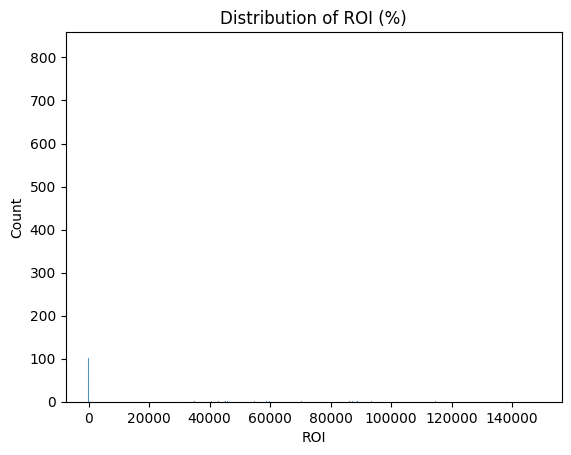

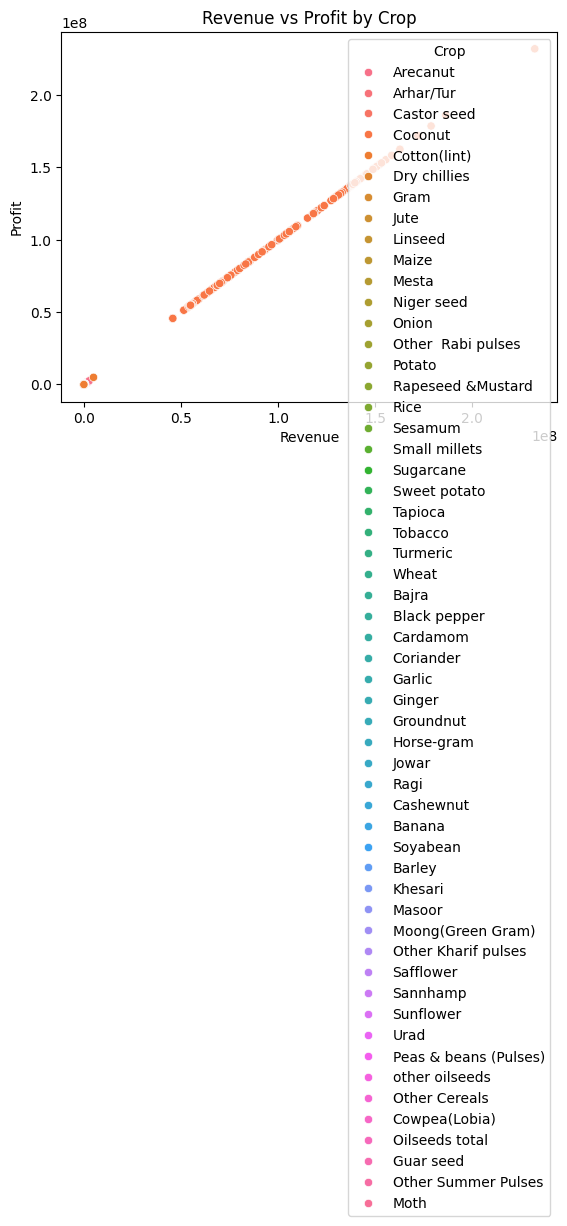

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ROI'])
plt.title("Distribution of ROI (%)")
plt.show()

sns.scatterplot(x='Revenue', y='Profit', data=df, hue='Crop')
plt.title("Revenue vs Profit by Crop")
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

le_state = LabelEncoder()
df['State_encoded'] = le_state.fit_transform(df['State'])

le_season = LabelEncoder()
df['Season_encoded'] = le_season.fit_transform(df['Season'])


In [16]:
features = ['Crop_encoded', 'State_encoded', 'Season_encoded', 'Area',
            'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Revenue']
X = df[features]
y = df['ROI']  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


ValueError: Input y contains NaN.

In [ ]:
df = df.dropna(subset=['ROI'])

features = ['Crop_encoded', 'State_encoded', 'Season_encoded', 'Area',
            'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Revenue']
X = df[features]
y = df['ROI']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
print(df[df['ROI'].isna()][['Crop', 'Market_Price', 'Cost_of_Cultivation']])

In [ ]:
# Drop rows where ROI is missing
df_clean = df.dropna(subset=['ROI'])

print("Original rows:", len(df))
print("Rows after dropping NaN ROI:", len(df_clean))


In [ ]:
features = ['Crop_encoded', 'State_encoded', 'Season_encoded', 'Area',
            'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Revenue']

X = df_clean[features]
y = df_clean['ROI']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


In [ ]:
# Which crops had missing Market_Price or Cost_of_Cultivation?
missing = df[df['ROI'].isna()][['Crop', 'Market_Price', 'Cost_of_Cultivation']]
print(missing['Crop'].unique())   # Which crops still need real data?


In [ ]:
df_clean.to_csv("crop_dataset_with_ROI_clean.csv", index=False)


In [ ]:
import joblib

joblib.dump(model, "trained_roi_model.pkl")
